In [1]:
import pandas as pd
import numpy as np
#from pandas.appes import CategoricalDtype
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
#from pandas.appes import CategoricalDtype
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [41]:
# 获取当前工作目录，即 notebook 所在位置
current_folder = os.getcwd()
# 找到所有以"transformer_blabla"开头的文件
file_names = [f for f in os.listdir(current_folder) if f.startswith("otdata_1024_1113")]
file_names

['otdata_1024_1113.csv']

In [42]:
# 初始化一个空的DataFrame来存储合并的数据
combined_df = pd.DataFrame()
# 定义正确的标题
expected_header = ['Tag', 'Value', 'TS']

# 读取每个CSV文件并追加到combined_df中
for file in file_names:
    # 先读取文件的前几行，获取header
    print(f'Reading {file}')
    file_path = os.path.join(os.getcwd(), file)
    df = pd.read_csv(file_path, nrows=0)
    current_header = df.columns.tolist()

    # 如果header不符合预期，则重新读取并添加header
    if current_header != expected_header:
        df = pd.read_csv(file, header=None, names=expected_header)
    else:
        df = pd.read_csv(file)
    
    # 合并数据
    combined_df = pd.concat([combined_df, df])

# format TS
# Filter out the problematic timestamp
combined_df = combined_df[combined_df['TS'] >= '2000-01-01 08:00:00']

combined_df['TS'] = pd.to_datetime(combined_df['TS'], format="mixed", utc=True).dt.tz_localize(None) #%Y-%m-%d %H:%M:%S.%f %z
combined_df['TS'] = combined_df['TS'].dt.floor('s')

# 删除基于TS和Tag字段的重复行，只保留第一次出现的记录
combined_df = combined_df.drop_duplicates(subset=['TS', 'Tag'])

combined_df = combined_df.sort_values(by='TS')
pivot_df = combined_df.pivot(index='TS', columns='Tag', values='Value').reset_index()
print(pivot_df['TS'].min(), pivot_df['TS'].max())

# 将合并后的数据保存到一个新的CSV文件中
#file_name = 'transformed_sorted_file_' + day_scope + '.csv'
#pivot_df.to_csv(file_name, index=False)

print("CSV files have been merged and sorted successfully.")

Reading otdata_1024_1113.csv


C:\Users\kana.jin\AppData\Local\Temp\ipykernel_11828\1826075481.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None, names=expected_header)


2024-10-24 00:00:00 2024-11-13 06:14:34
CSV files have been merged and sorted successfully.


In [43]:
pivot_df.columns

Index(['TS', 'CG STI.CG STI.LoafGum.LoafGum01MaxTemp',
       'CG STI.CG STI.LoafGum.LoafGum01MinTemp',
       'CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rChillerSetpoint',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum1InletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum1OutletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum2InletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum2OutletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumExitTempLeft',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumExitTempRight',
       'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM',
       'CG_Sheeting.CG_Sheeting.dbHMI.Sheeting.SRV_Gap1stSizing.rActualPosition_inches',
       'CG_Sheeting.CG_Sheeting.dbHMI.Sheeting.SRV_

In [44]:
Temp_list = ['TS',
             'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM', #横刀速度
             'CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp', # 挤压机出口胶温度
             'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature', # 冷辊入口胶温度
             'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue',
             'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP',
             'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue',
             'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP'
             #'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_UB_Temp_RealValue'            
            ] 

Temp_df = pivot_df[Temp_list]
Temp_df.fillna(method='ffill', inplace=True)
Temp_df = Temp_df.dropna()
Temp_df['CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM'] = pd.to_numeric(Temp_df['CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM'], errors='coerce')
Temp_df = Temp_df[Temp_df['CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM'] > 0]

Temp_df

C:\Users\kana.jin\AppData\Local\Temp\ipykernel_11828\800916632.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df.fillna(method='ffill', inplace=True)


Tag,TS,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP
4285,2024-10-24 01:11:28,185.36298,41.886574,30.273438,64.3,45.0,64.58,45.0
4286,2024-10-24 01:11:29,185.42543,41.46991,30.273438,64.19,45.0,64.53,45.0
4287,2024-10-24 01:11:30,185.52461,41.493053,30.1794,64.13,45.0,64.53,45.0
4288,2024-10-24 01:11:31,185.54497,41.15741,30.266205,64.02,45.0,64.53,45.0
4289,2024-10-24 01:11:32,185.35669,41.180553,30.266205,63.96,45.0,64.47,45.0
...,...,...,...,...,...,...,...,...
963528,2024-11-13 06:14:30,211.28050,47.314816,38.780384,47.92,48.0,54.41,55.0
963529,2024-11-13 06:14:31,211.11798,47.36111,38.87442,47.92,48.0,54.41,55.0
963530,2024-11-13 06:14:32,211.11798,47.36111,38.87442,47.92,48.0,54.41,55.0
963531,2024-11-13 06:14:33,211.22234,47.38426,38.780384,47.81,48.0,54.46,55.0


In [45]:
import pandas as pd

# 读取 Excel 文件和 CSV 文件
weight = pd.read_excel('spc_20240801.xlsx')
weight2 = pd.read_csv('spc_1113.csv', header=None)

# 使用 weight 的列名为 weight2 赋值列名
weight2.columns = weight.columns

# 假设 `Date` 列存储了时间数据
weight['Date'] = pd.to_datetime(weight['Date'], errors='coerce')
weight2['Date'] = pd.to_datetime(weight2['Date'], errors='coerce')

# 合并两个数据框，并去重
#combined_weight = pd.concat([weight, weight2], ignore_index=True).drop_duplicates()

# 再次将 `Date` 转换为 `datetime`，并排除无效数据
#combined_weight['Date'] = pd.to_datetime(combined_weight['Date'], errors='coerce')
#combined_weight = combined_weight.dropna(subset=['Date'])  # 去除 'Date' 列中 NaT 的行
#combined_weight = combined_weight.sort_values(by='Date')

# 获取第一个和最后一个值
#first_value = combined_weight.iloc[0]['Date']
#last_value = combined_weight.iloc[-1]['Date']

#print("第一个值:\n", first_value)
#print("\n最后一个值:\n", last_value)

In [46]:
weight2

,ID,Date,Item_code,Item,length_or_thickness,width_or_depth,Operator,Shift,length_or_thickness_std,width_or_depth_std,Status,Load,entry_type,Target,Actual
0,678377,2024-11-13 13:20:59,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,0,316,3,35.23,35.25
1,678376,2024-11-13 13:20:57,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,0,316,3,35.23,35.13
2,678375,2024-11-13 13:20:54,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,1,316,3,35.23,34.86
3,678374,2024-11-13 13:20:52,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,1,316,3,35.23,35.09
4,678373,2024-11-13 13:20:49,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,0,316,3,35.23,35.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,670565,2024-11-04 00:59:44,557729,DMPE 绿箭原味薄荷,NaN,NaN,林波,晚班,NaN,NaN,0,6,3,35.23,35.38
7813,670564,2024-11-04 00:50:02,557729,DMPE 绿箭原味薄荷,1.78,1.16,林波,晚班,1.75,1.1,0,1,1,NaN,NaN
7814,670563,2024-11-04 00:48:51,557729,DMPE 绿箭原味薄荷,71.53,38.33,林波,晚班,71.70,38.5,0,1,2,NaN,NaN
7815,670562,2024-11-04 00:48:34,557729,DMPE 绿箭原味薄荷,NaN,NaN,林波,晚班,NaN,NaN,0,1,3,35.23,35.55


In [47]:
spc = weight2 
spc.rename(columns={
        'entry_type': 'entryType', 
        'length_or_thickness': 'LengthOrThickness',
        'width_or_depth': 'WidthOrDepth',
        'Actual':'Weight'
    }, inplace=True)
spc

,ID,Date,Item_code,Item,LengthOrThickness,WidthOrDepth,Operator,Shift,length_or_thickness_std,width_or_depth_std,Status,Load,entryType,Target,Weight
0,678377,2024-11-13 13:20:59,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,0,316,3,35.23,35.25
1,678376,2024-11-13 13:20:57,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,0,316,3,35.23,35.13
2,678375,2024-11-13 13:20:54,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,1,316,3,35.23,34.86
3,678374,2024-11-13 13:20:52,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,1,316,3,35.23,35.09
4,678373,2024-11-13 13:20:49,557729,DMPE 绿箭原味薄荷,NaN,NaN,梁锦泓,早班,NaN,NaN,0,316,3,35.23,35.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,670565,2024-11-04 00:59:44,557729,DMPE 绿箭原味薄荷,NaN,NaN,林波,晚班,NaN,NaN,0,6,3,35.23,35.38
7813,670564,2024-11-04 00:50:02,557729,DMPE 绿箭原味薄荷,1.78,1.16,林波,晚班,1.75,1.1,0,1,1,NaN,NaN
7814,670563,2024-11-04 00:48:51,557729,DMPE 绿箭原味薄荷,71.53,38.33,林波,晚班,71.70,38.5,0,1,2,NaN,NaN
7815,670562,2024-11-04 00:48:34,557729,DMPE 绿箭原味薄荷,NaN,NaN,林波,晚班,NaN,NaN,0,1,3,35.23,35.55


In [48]:
def merge_OT_SPC(curated_spc):
    # Step 1: 处理 spc 数据
    spc = curated_spc.copy()
    
    spc['Date'] = pd.to_datetime(spc['Date'], format="%Y-%m-%d %H:%M:%S", utc=True).dt.tz_localize(None)
    spc = spc.sort_values(by='Date', ascending=True)
    
    # Step 2: 筛选 EntryType 等于 3 的数据
    entry_type_3 = spc[spc['entryType'] == 3]
    
    # Step 3: MAPPING 长宽
    def find_corresponding_length_width(row, df):
        # 1分钟内的条件，并且 Load 和 Item 一致
        condition_1min = (
            (df['Date'] > row['Date']) &
            (df['Date'] <= row['Date'] + pd.Timedelta(minutes=1)) &
            (df['entryType'] == 2) &
            (df['Load'] == row['Load']) & 
            (df['Item'] == row['Item'])
        )
        corresponding_row_1min = df[condition_1min]
        
        if not corresponding_row_1min.empty:
            corresponding_row = corresponding_row_1min.iloc[0]
        else:
            condition_3min = (
                (df['Date'] > row['Date']) &
                (df['Date'] <= row['Date'] + pd.Timedelta(minutes=3)) &
                (df['entryType'] == 2) &
                (df['Load'] == row['Load']) & 
                (df['Item'] == row['Item'])
            )
            corresponding_row_3min = df[condition_3min]
            
            if not corresponding_row_3min.empty:
                corresponding_row = corresponding_row_3min.iloc[0]
            else:
                return pd.Series({
                    'DataTime': row['Date'],
                    'Shift': row['Shift'],
                    'Load': row['Load'],
                    'Item': row['Item'],
                    'Weight': row['Weight'],
                    'LengthOrThickness': 'NA',
                    'WidthOrDepth': 'NA',
                    'DataTime2': 'NA'
                })
        
        return pd.Series({
            'DataTime': row['Date'],
            'Shift': row['Shift'],
            'Load': row['Load'],
            'Item': row['Item'],
            'Weight': row['Weight'],
            'LengthOrThickness': corresponding_row['LengthOrThickness'],
            'WidthOrDepth': corresponding_row['WidthOrDepth'],
            'DataTime2': corresponding_row['Date']
        })

    result3 = entry_type_3.apply(lambda row: find_corresponding_length_width(row, spc), axis=1)
    
    result3['DataTime'] = pd.to_datetime(result3['DataTime'])
    result3['DataTime2'] = pd.to_datetime(result3['DataTime2'], errors='coerce')
    result3['TimeDiff'] = result3['DataTime2'] - result3['DataTime']
    
    # 根据 Item 的首字母判断是否含有糖
    result3['Sugar'] = np.where(result3['Item'].str[0].isin(['D', 'W', 'R']), 'Sugar', 'Sugarfree')
    
    return result3

spc_df = merge_OT_SPC(spc)
spc_df

,DataTime,Shift,Load,Item,Weight,LengthOrThickness,WidthOrDepth,DataTime2,TimeDiff,Sugar
7816,2024-11-04 00:48:25,晚班,1,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,0 days 00:00:26,Sugar
7815,2024-11-04 00:48:34,晚班,1,DMPE 绿箭原味薄荷,35.55,71.53,38.33,2024-11-04 00:48:51,0 days 00:00:17,Sugar
7812,2024-11-04 00:59:44,晚班,6,DMPE 绿箭原味薄荷,35.38,71.3,38.43,2024-11-04 01:00:05,0 days 00:00:21,Sugar
7811,2024-11-04 00:59:47,晚班,6,DMPE 绿箭原味薄荷,35.37,71.3,38.43,2024-11-04 01:00:05,0 days 00:00:18,Sugar
7808,2024-11-04 01:03:49,晚班,11,DMPE 绿箭原味薄荷,35.44,71.0,38.98,2024-11-04 01:04:35,0 days 00:00:46,Sugar
...,...,...,...,...,...,...,...,...,...,...
4,2024-11-13 13:20:49,早班,316,DMPE 绿箭原味薄荷,35.31,NA,NA,NaT,NaT,Sugar
3,2024-11-13 13:20:52,早班,316,DMPE 绿箭原味薄荷,35.09,NA,NA,NaT,NaT,Sugar
2,2024-11-13 13:20:54,早班,316,DMPE 绿箭原味薄荷,34.86,NA,NA,NaT,NaT,Sugar
1,2024-11-13 13:20:57,早班,316,DMPE 绿箭原味薄荷,35.13,NA,NA,NaT,NaT,Sugar


In [49]:
# 将 'DataTime' 列转换为 datetime 格式
spc_df['DataTime'] = pd.to_datetime(spc_df['DataTime'])

# 按 'DataTime' 列排序，以确保时间顺序正确
spc_df = spc_df.sort_values('DataTime').reset_index(drop=True)

# 计算每一行和上一行之间的时间差（秒）
spc_df['TimeDiff'] = spc_df['DataTime'].diff().dt.total_seconds()

# 只保留与前一行时间差大于30秒的记录或第一行记录
filtered_df = spc_df[(spc_df['TimeDiff'] > 30) | (spc_df['TimeDiff'].isna())].copy()

# 去掉临时生成的 TimeDiff 列
filtered_df = filtered_df.drop(columns=['TimeDiff'])

# 查看筛选后的结果
filtered_df

,DataTime,Shift,Load,Item,Weight,LengthOrThickness,WidthOrDepth,DataTime2,Sugar
0,2024-11-04 00:48:25,晚班,1,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar
2,2024-11-04 00:59:44,晚班,6,DMPE 绿箭原味薄荷,35.38,71.3,38.43,2024-11-04 01:00:05,Sugar
4,2024-11-04 01:03:49,晚班,11,DMPE 绿箭原味薄荷,35.44,71.0,38.98,2024-11-04 01:04:35,Sugar
6,2024-11-04 01:15:02,晚班,16,DMPE 绿箭原味薄荷,35.36,71.27,38.43,2024-11-04 01:15:23,Sugar
8,2024-11-04 01:22:26,晚班,22,DMPE 绿箭原味薄荷,35.40,71.29,38.46,2024-11-04 01:22:57,Sugar
...,...,...,...,...,...,...,...,...,...
5366,2024-11-13 12:39:54,早班,295,DMPE 绿箭原味薄荷,34.73,NA,NA,NaT,Sugar
5376,2024-11-13 12:50:05,早班,300,DMPE 绿箭原味薄荷,34.97,NA,NA,NaT,Sugar
5385,2024-11-13 13:03:21,早班,305,DMPE 绿箭原味薄荷,35.44,NA,NA,NaT,Sugar
5394,2024-11-13 13:13:28,早班,310,DMPE 绿箭原味薄荷,34.81,NA,NA,NaT,Sugar


In [50]:
Temp_df

Tag,TS,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP
4285,2024-10-24 01:11:28,185.36298,41.886574,30.273438,64.3,45.0,64.58,45.0
4286,2024-10-24 01:11:29,185.42543,41.46991,30.273438,64.19,45.0,64.53,45.0
4287,2024-10-24 01:11:30,185.52461,41.493053,30.1794,64.13,45.0,64.53,45.0
4288,2024-10-24 01:11:31,185.54497,41.15741,30.266205,64.02,45.0,64.53,45.0
4289,2024-10-24 01:11:32,185.35669,41.180553,30.266205,63.96,45.0,64.47,45.0
...,...,...,...,...,...,...,...,...
963528,2024-11-13 06:14:30,211.28050,47.314816,38.780384,47.92,48.0,54.41,55.0
963529,2024-11-13 06:14:31,211.11798,47.36111,38.87442,47.92,48.0,54.41,55.0
963530,2024-11-13 06:14:32,211.11798,47.36111,38.87442,47.92,48.0,54.41,55.0
963531,2024-11-13 06:14:33,211.22234,47.38426,38.780384,47.81,48.0,54.46,55.0


In [51]:
import pandas as pd

def is_producing(row):
    # 转换为数值类型，非数值部分转为 NaN
    try:
        extruder_temp = pd.to_numeric(row['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp'], errors='coerce')
        entrance_temp = pd.to_numeric(row['CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature'], errors='coerce')
        velocity_rpm = pd.to_numeric(row['CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM'], errors='coerce')
    except KeyError:
        # 如果列名不存在，可以选择抛出一个异常或记录日志
        print("One or more columns are missing.")
        return 'off'

    # 判断是否满足生产条件
    if (pd.notna(extruder_temp) and extruder_temp >= 40 and
        pd.notna(entrance_temp) and entrance_temp >= 32 and
        pd.notna(velocity_rpm) and velocity_rpm > 100):
        return 'produce'  # 生产
    else:
        return 'off'  # 停机

# 去除空值
Temp_df_nona = Temp_df.dropna()

# 检查和过滤异常值
for column in ['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp', 
               'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature',
               'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM']:
    # 转换为数值，并过滤掉0、负值和极端偏离均值的数据
    Temp_df_nona[column] = pd.to_numeric(Temp_df_nona[column], errors='coerce')
    mean_value = Temp_df_nona[column].mean()
    std_dev = Temp_df_nona[column].std()
    Temp_df_nona = Temp_df_nona[(Temp_df_nona[column] > 0) & 
                                (Temp_df_nona[column] < mean_value + 3 * std_dev)]

# 应用生产/停机条件
Temp_df_nona['offperiod'] = Temp_df_nona.apply(is_producing, axis=1)

# 显示数据框
parm = Temp_df_nona
parm

Tag,TS,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP,offperiod
4285,2024-10-24 01:11:28,185.36298,41.886574,30.273438,64.3,45.0,64.58,45.0,off
4286,2024-10-24 01:11:29,185.42543,41.469910,30.273438,64.19,45.0,64.53,45.0,off
4287,2024-10-24 01:11:30,185.52461,41.493053,30.179400,64.13,45.0,64.53,45.0,off
4288,2024-10-24 01:11:31,185.54497,41.157410,30.266205,64.02,45.0,64.53,45.0,off
4289,2024-10-24 01:11:32,185.35669,41.180553,30.266205,63.96,45.0,64.47,45.0,off
...,...,...,...,...,...,...,...,...,...
963528,2024-11-13 06:14:30,211.28050,47.314816,38.780384,47.92,48.0,54.41,55.0,produce
963529,2024-11-13 06:14:31,211.11798,47.361110,38.874420,47.92,48.0,54.41,55.0,produce
963530,2024-11-13 06:14:32,211.11798,47.361110,38.874420,47.92,48.0,54.41,55.0,produce
963531,2024-11-13 06:14:33,211.22234,47.384260,38.780384,47.81,48.0,54.46,55.0,produce


In [52]:
parm = parm.sort_values(by = 'TS')
parm

Tag,TS,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP,offperiod
4285,2024-10-24 01:11:28,185.36298,41.886574,30.273438,64.3,45.0,64.58,45.0,off
4286,2024-10-24 01:11:29,185.42543,41.469910,30.273438,64.19,45.0,64.53,45.0,off
4287,2024-10-24 01:11:30,185.52461,41.493053,30.179400,64.13,45.0,64.53,45.0,off
4288,2024-10-24 01:11:31,185.54497,41.157410,30.266205,64.02,45.0,64.53,45.0,off
4289,2024-10-24 01:11:32,185.35669,41.180553,30.266205,63.96,45.0,64.47,45.0,off
...,...,...,...,...,...,...,...,...,...
963528,2024-11-13 06:14:30,211.28050,47.314816,38.780384,47.92,48.0,54.41,55.0,produce
963529,2024-11-13 06:14:31,211.11798,47.361110,38.874420,47.92,48.0,54.41,55.0,produce
963530,2024-11-13 06:14:32,211.11798,47.361110,38.874420,47.92,48.0,54.41,55.0,produce
963531,2024-11-13 06:14:33,211.22234,47.384260,38.780384,47.81,48.0,54.46,55.0,produce


In [53]:
para = parm
latest_dict = para.iloc[-1].to_dict()
para['TS'] = pd.to_datetime(para['TS']) + timedelta(minutes=1)
# 将 TS 列重命名为 Date
para.rename(columns={'TS': 'DataTime'}, inplace=True)

In [54]:
spc_df = filtered_df
#spc_df['day_shift'] =  spc_df['DataTime'].dt.date.astype(str) + ' ' + spc_df['Shift']
spc_df = spc_df.sort_values(by='DataTime').reset_index(drop=True)   
# 检测 item 的变化，并生成 batch 列  
spc_df['batch'] = (spc_df['Item'] != spc_df['Item'].shift()).cumsum()
spc_df['day_shift'] = spc_df['batch'].astype(str) + ' ' + spc_df['Shift']
#spc_df = spc_df.dropna()
spc_df

,DataTime,Shift,Load,Item,Weight,LengthOrThickness,WidthOrDepth,DataTime2,Sugar,batch,day_shift
0,2024-11-04 00:48:25,晚班,1,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar,1,1 晚班
1,2024-11-04 00:59:44,晚班,6,DMPE 绿箭原味薄荷,35.38,71.3,38.43,2024-11-04 01:00:05,Sugar,1,1 晚班
2,2024-11-04 01:03:49,晚班,11,DMPE 绿箭原味薄荷,35.44,71.0,38.98,2024-11-04 01:04:35,Sugar,1,1 晚班
3,2024-11-04 01:15:02,晚班,16,DMPE 绿箭原味薄荷,35.36,71.27,38.43,2024-11-04 01:15:23,Sugar,1,1 晚班
4,2024-11-04 01:22:26,晚班,22,DMPE 绿箭原味薄荷,35.40,71.29,38.46,2024-11-04 01:22:57,Sugar,1,1 晚班
...,...,...,...,...,...,...,...,...,...,...,...
1071,2024-11-13 12:39:54,早班,295,DMPE 绿箭原味薄荷,34.73,NA,NA,NaT,Sugar,19,19 早班
1072,2024-11-13 12:50:05,早班,300,DMPE 绿箭原味薄荷,34.97,NA,NA,NaT,Sugar,19,19 早班
1073,2024-11-13 13:03:21,早班,305,DMPE 绿箭原味薄荷,35.44,NA,NA,NaT,Sugar,19,19 早班
1074,2024-11-13 13:13:28,早班,310,DMPE 绿箭原味薄荷,34.81,NA,NA,NaT,Sugar,19,19 早班


In [55]:
# Step 0: 删除 spc 中早于 para 第一个时间戳的数据
spc = spc_df[spc_df['DataTime'] >= '2024-08-01 00:00:00']

# Step 1: 生成完整的时间序列
# 根据 spc 中 'Date' 列的最小值和最大值，生成一个以秒为单位的完整时间序列
full_time_range = pd.date_range(start=spc['DataTime'].min(), 
                                end=spc['DataTime'].max(), 
                                freq='S')  # freq='S' 代表以秒为单位

# Step 2: 将 spc 的 'Date' 列重新索引到完整的时间序列上
spc_full = spc.set_index('DataTime').reindex(full_time_range)

# Step 3: 使用 ffill 填充缺失值
spc_full.fillna(method='ffill', inplace=True)

# 将索引 'Date' 变回列
spc_full.reset_index(inplace=True)
spc_full.rename(columns={'index': 'DataTime'}, inplace=True)

# 显示填充后的 spc_full
#spc_full['Day'] = spc_full['Date'].dt.date
#spc_full['Day_shift'] = spc_full['Day'].astype(str) + ' ' + spc_full['Shift']
spc_full

,DataTime,Shift,Load,Item,Weight,LengthOrThickness,WidthOrDepth,DataTime2,Sugar,batch,day_shift
0,2024-11-04 00:48:25,晚班,1.0,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar,1.0,1 晚班
1,2024-11-04 00:48:26,晚班,1.0,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar,1.0,1 晚班
2,2024-11-04 00:48:27,晚班,1.0,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar,1.0,1 晚班
3,2024-11-04 00:48:28,晚班,1.0,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar,1.0,1 晚班
4,2024-11-04 00:48:29,晚班,1.0,DMPE 绿箭原味薄荷,35.66,71.53,38.33,2024-11-04 00:48:51,Sugar,1.0,1 晚班
...,...,...,...,...,...,...,...,...,...,...,...
822728,2024-11-13 13:20:33,早班,310.0,DMPE 绿箭原味薄荷,34.81,NA,NA,2024-11-13 12:18:24,Sugar,19.0,19 早班
822729,2024-11-13 13:20:34,早班,310.0,DMPE 绿箭原味薄荷,34.81,NA,NA,2024-11-13 12:18:24,Sugar,19.0,19 早班
822730,2024-11-13 13:20:35,早班,310.0,DMPE 绿箭原味薄荷,34.81,NA,NA,2024-11-13 12:18:24,Sugar,19.0,19 早班
822731,2024-11-13 13:20:36,早班,310.0,DMPE 绿箭原味薄荷,34.81,NA,NA,2024-11-13 12:18:24,Sugar,19.0,19 早班


In [56]:
# 由于生产流程：挤压机 - 辊轮 - 冷辊 - 圆刀 - 横刀 - SPC测量
# 所以spc datetime 需要减少1min，去mapping 参数数据
spc_full['DataTime'] = spc_full['DataTime'] - pd.Timedelta(minutes=1)

# Perform merge using 'TS' from Temp_df_nona and 'Date' from weight_clean
join_result = pd.merge(
    para, 
    spc_full, 
    left_on=['DataTime'],  
    right_on=['DataTime'],  
    how='left' 
)

# Display the join result
#join_result2 = join_result[join_result['TimeDiff_min']> 0 ]
join_result

,DataTime,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP,offperiod,Shift,Load,Item,Weight,LengthOrThickness,WidthOrDepth,DataTime2,Sugar,batch,day_shift
0,2024-10-24 01:12:28,185.36298,41.886574,30.273438,64.3,45.0,64.58,45.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,2024-10-24 01:12:29,185.42543,41.469910,30.273438,64.19,45.0,64.53,45.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2024-10-24 01:12:30,185.52461,41.493053,30.179400,64.13,45.0,64.53,45.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,2024-10-24 01:12:31,185.54497,41.157410,30.266205,64.02,45.0,64.53,45.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,2024-10-24 01:12:32,185.35669,41.180553,30.266205,63.96,45.0,64.47,45.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800173,2024-11-13 06:15:30,211.28050,47.314816,38.780384,47.92,48.0,54.41,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班
800174,2024-11-13 06:15:31,211.11798,47.361110,38.874420,47.92,48.0,54.41,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班
800175,2024-11-13 06:15:32,211.11798,47.361110,38.874420,47.92,48.0,54.41,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班
800176,2024-11-13 06:15:33,211.22234,47.384260,38.780384,47.81,48.0,54.46,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班


In [57]:
join_result = join_result[join_result['DataTime'] > '2024-11-04 00:00:00']
join_result

,DataTime,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP,offperiod,Shift,Load,Item,Weight,LengthOrThickness,WidthOrDepth,DataTime2,Sugar,batch,day_shift
257631,2024-11-04 00:00:03,0.000079,24.988424,23.589410,64.07,65.0,65.21,65.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
257632,2024-11-04 00:00:04,0.000079,24.953705,23.589410,64.3,65.0,65.15,65.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
257633,2024-11-04 00:00:29,0.000079,24.976852,23.661747,64.92,65.0,64.53,65.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
257634,2024-11-04 00:00:30,0.000079,24.976852,23.661747,64.81,65.0,64.53,65.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
257635,2024-11-04 00:00:42,0.000079,24.965277,23.459202,64.19,65.0,64.36,65.0,off,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800173,2024-11-13 06:15:30,211.280500,47.314816,38.780384,47.92,48.0,54.41,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班
800174,2024-11-13 06:15:31,211.117980,47.361110,38.874420,47.92,48.0,54.41,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班
800175,2024-11-13 06:15:32,211.117980,47.361110,38.874420,47.92,48.0,54.41,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班
800176,2024-11-13 06:15:33,211.222340,47.384260,38.780384,47.81,48.0,54.46,55.0,produce,晚班,183.0,DMPE 绿箭原味薄荷,35.21,71.25,38.63,2024-11-13 05:57:28,Sugar,19.0,19 晚班


In [58]:
join_result = join_result.dropna()

In [59]:
import pandas as pd

# 初始化一个空列表用于保存每个 SKU 的数据
summary_data_lower5 = []

# 遍历 join_result 中每种独特的 SKU
for flavour in join_result['Item'].unique():
    # 筛选出当前 SKU 的数据
    df = join_result[join_result['Item'] == flavour]
    
    # 获取所有生产数据中的挤压机出口温度
    df_produce = df[df['offperiod'] == 'produce']  # 仅保留生产时段的数据
    temperatures = df_produce['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp'].sort_values()

    # Step 1: 计算 10% 和 99.7% 分位数
    percentile_10 = temperatures.quantile(0.1)
    percentile_90 = temperatures.quantile(0.9)
    
    # Step 2: 计算均值和中位数
    mean_temp = temperatures.mean()
    median_temp = temperatures.median()

    # 获取所有班次的列表
    all_shifts = df['day_shift'].unique().tolist()

    # 将数据保存到 summary_data_lower5 列表中
    summary_data_lower5.append({
        'sku': flavour,
        'shift_数量': len(all_shifts),  # 计算 unique 的班次数量
        '班次列表': all_shifts,  # 添加所有班次
        '10th percentile': percentile_10,
        '90th percentile': percentile_90,
        'mean': mean_temp,
        'median': median_temp
    })

    # 打印数据作为验证
    print(f"{flavour} - 10th percentile: {percentile_10}")
    print(f"{flavour} - 90th percentile: {percentile_90}")

# Step 3: 将 summary_data_lower5 列表转换为 DataFrame
summary_df_lower5 = pd.DataFrame(summary_data_lower5)

# 显示结果 DataFrame
summary_df_lower5

DMPE 绿箭原味薄荷 - 10th percentile: 46.67824
DMPE 绿箭原味薄荷 - 90th percentile: 48.24074
DMPY（绿箭金装薄荷） - 10th percentile: 47.175926
DMPY（绿箭金装薄荷） - 90th percentile: 49.20139
FVSS（FIVE酷酸草莓味-NCS） - 10th percentile: 50.625
FVSS（FIVE酷酸草莓味-NCS） - 90th percentile: 51.99074
AUWM（澳洲FIVE奔涌西瓜味） - 10th percentile: 49.23611
AUWM（澳洲FIVE奔涌西瓜味） - 90th percentile: 52.01389
RPWP（维能西瓜红石榴） - 10th percentile: 51.041664
RPWP（维能西瓜红石榴） - 90th percentile: 51.458336
EXCW（益达西瓜-NCS） - 10th percentile: 50.729164
EXCW（益达西瓜-NCS） - 90th percentile: 52.824074
FVBB（FIVE魅幻蓝莓-NCS） - 10th percentile: 50.70602
FVBB（FIVE魅幻蓝莓-NCS） - 90th percentile: 51.71296
EBB（益达蓝莓-NCS） - 10th percentile: 49.953705
EBB（益达蓝莓-NCS） - 90th percentile: 51.28472
EXPP（益达冰凉薄荷味） - 10th percentile: 51.516205
EXPP（益达冰凉薄荷味） - 90th percentile: 52.69676
EXSM（益达沁凉薄荷-NCS） - 10th percentile: 52.03704
EXSM（益达沁凉薄荷-NCS） - 90th percentile: 52.73148
FVPP（FIVE激酷薄荷味-NCS） - 10th percentile: 51.516205
FVPP（FIVE激酷薄荷味-NCS） - 90th percentile: 55.475697000000004
EXTP（益达热带水果-NCS）

,sku,shift_数量,班次列表,10th percentile,90th percentile,mean,median
0,DMPE 绿箭原味薄荷,9,"[1 晚班 , 1 早班 , 3 晚班 , 3 早...",46.678240,48.240740,47.412670,47.395836
1,DMPY（绿箭金装薄荷）,5,"[2 早班 , 2 中班 , 18 晚班 , 18...",47.175926,49.201390,48.029987,47.858795
2,FVSS（FIVE酷酸草莓味-NCS）,4,"[4 中班 , 4 晚班 , 7 晚班 , 7 早...",50.625000,51.990740,51.274521,51.319447
3,AUWM（澳洲FIVE奔涌西瓜味）,1,[5 晚班 ],49.236110,52.013890,50.918275,50.995370
4,RPWP（维能西瓜红石榴）,1,[6 晚班 ],51.041664,51.458336,51.250323,51.261574
5,EXCW（益达西瓜-NCS）,3,"[8 早班 , 8 中班 , 8 晚班 ]",50.729164,52.824074,51.760630,51.932870
6,FVBB（FIVE魅幻蓝莓-NCS）,2,"[9 中班 , 9 晚班 ]",50.706020,51.712960,51.099735,51.215280
7,EBB（益达蓝莓-NCS）,3,"[10 晚班 , 10 早班 , 10 中班 ]",49.953705,51.284720,50.587393,50.717590
8,EXPP（益达冰凉薄荷味）,1,[11 中班 ],51.516205,52.696760,52.092531,52.094910
9,EXSM（益达沁凉薄荷-NCS）,1,[12 早班 ],52.037040,52.731480,52.313054,52.349540


In [60]:
summary_df_lower5.to_csv('temp_bysku_UAT_1113.csv')

In [61]:
join_result.groupby('day_shift')['DataTime'].count()

day_shift
1 早班             20076
1 晚班             25002
10 中班             5188
10 早班            23190
10 晚班            21691
11 中班             4525
12 早班             7739
13 中班            13299
14 中班             6793
14 晚班            18924
15 中班            12509
15 早班            23622
17 晚班             2060
18 中班             8169
18 早班            32077
18 晚班             8951
19 中班             1948
19 晚班            21951
2 中班             26794
2 早班              7565
3 中班             12136
3 早班             25243
3 晚班             26431
4 中班              7012
4 晚班              9496
5 晚班              1823
6 晚班               215
7 早班              5853
7 晚班             14669
8 中班             44517
8 早班             55746
8 晚班             20984
9 中班             21742
9 晚班              2541
Name: DataTime, dtype: int64

## 嘴口分析（单调性分析）

在选择设定值和实际值之间的比较时，可以考虑以下几个因素：

	1.	设定值（即你想达到的目标温度）：
	•	使用设定值来计算KPI时，重点在于监控“你希望的控制效果”对温度波动的影响。通过观察设定值的变化，你可以更清晰地看到在不同的控制目标下，实际温度是否能够稳定在预期范围内。
	•	如果你的目标是评估“控制策略本身的有效性”，设定值可能是更合适的选择。这样可以反映“控制系统设置的调整对实际温度稳定性的影响”。
	2.	机器实际值（即机器在操作中实际达到的温度）：
	•	使用实际值可以更直接地反映设备在运行中的调整和控制情况。实际值比设定值更真实地反映了设备在特定设定条件下的反应，也能捕捉到设定和实际情况之间的偏差。
	•	如果你的目标是评估“设备对设定值响应的及时性和准确性”，实际值可能更合适。实际值的变化情况可以直接反映设备响应速度的快慢以及是否存在滞后性或其他控制问题。

综合建议

为了得到更全面的结果，可以尝试以下几种方案：
	1.	先使用设定值来评估KPI，确定在设定值频繁变化时，实际出口温度的稳定性。如果设定值的调整对实际温度方差没有显著影响，那么可以进一步分析。
	2.	结合实际值来评估设备的响应延迟或控制偏差。如果发现实际值和设定值偏差较大，则说明设备可能存在响应慢、无法及时跟随设定值变化的问题。

实践中的选择

在实际数据分析中，你可以从设定值开始，初步得到KPI指标，若有疑问或结果不明显，再引入实际值进行对比分析。这种分阶段分析方式可以帮助你逐步明确设定值和实际值之间的关系以及它们对实际温度控制效果的影响。

In [28]:
join_result = pd.read_csv('pivot_data_1113.csv')

In [24]:
join_result.columns

Index(['Unnamed: 0', 'DataTime',
       'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM',
       'CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature',
       'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue',
       'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP',
       'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue',
       'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP',
       'offperiod', 'Shift', 'Load', 'Item', 'Weight', 'LengthOrThickness',
       'WidthOrDepth', 'DataTime2', 'Sugar', 'batch', 'day_shift'],
      dtype='object')

In [33]:
join_result.describe()

,Unnamed: 0,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP,Load,Weight,LengthOrThickness,WidthOrDepth,batch
count,540481.000000,540481.000000,540481.000000,540481.000000,540481.000000,540481.000000,540481.000000,540481.000000,540481.000000,540481.000000,364020.000000,364020.000000,540481.000000
mean,529937.000000,180.287376,46.736311,37.278855,52.001586,52.266104,60.341740,60.559629,155.376343,35.276185,71.290076,38.708239,8.893393
std,156023.569758,53.679315,7.326721,5.948484,9.818452,10.303179,6.105551,6.200761,112.244812,0.220907,0.321076,0.308154,5.492958
min,259697.000000,0.000079,20.462963,14.308450,21.720000,25.000000,36.400000,30.000000,1.000000,34.070000,70.020000,37.900000,1.000000
25%,394817.000000,183.431950,47.048610,38.187210,40.720000,40.000000,54.910000,55.000000,63.000000,35.130000,71.100000,38.460000,3.000000
50%,529937.000000,187.325400,48.171295,39.178240,50.230000,50.000000,62.540000,63.000000,136.000000,35.280000,71.300000,38.670000,8.000000
75%,665057.000000,210.292100,51.365740,40.784145,60.220000,62.000000,64.810000,65.000000,236.000000,35.430000,71.480000,38.930000,14.000000
max,800177.000000,221.743590,57.233795,42.686634,75.020000,78.000000,75.300000,75.000000,490.000000,36.160000,72.430000,39.910000,19.000000


In [29]:
# 确保数据按时间排序
join_result['DataTime'] = pd.to_datetime(join_result['DataTime'])
join_result = join_result.sort_values('DataTime')
join_result.set_index('DataTime', inplace=True)

# 定义时间间隔 (30分钟)
time_interval = '30min'

# 计算KPI函数
def calculate_kpi(df, setting_col):
    kpis = []
    time_groups = df.resample(time_interval)
    
    for time, group in time_groups:
        # 温度设定变化总和
        setting_changes = group[setting_col].diff().abs().sum()
        
        # 出口胶温的方差
        temp_variance = group['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp'].var()
        
        # KPI计算
        kpi_value = setting_changes / temp_variance if temp_variance != 0 else np.nan
        kpis.append({'Time': time, 'KPI': kpi_value})
    
    return pd.DataFrame(kpis)


In [30]:
# 上口设定
kpi_upper = calculate_kpi(join_result, 'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP')
kpi_upper['Type'] = 'Upper Setting'

# 嘴口设定
kpi_lower = calculate_kpi(join_result, 'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP')
kpi_lower['Type'] = 'Lower Setting'

In [31]:
# 筛选有糖和无糖数据
sugar_data = join_result[join_result['Sugar'] == 'Sugar']
sugarfree_data = join_result[join_result['Sugar'] == 'Sugarfree']

# 计算有糖的KPI
kpi_upper_sugar = calculate_kpi(sugar_data, 'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue')
kpi_upper_sugar['Type'] = 'Upper Setting'
kpi_upper_sugar['Sugar'] = 'Sugar'

kpi_lower_sugar = calculate_kpi(sugar_data, 'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue')
kpi_lower_sugar['Type'] = 'Lower Setting'
kpi_lower_sugar['Sugar'] = 'Sugar'

# 计算无糖的KPI
kpi_upper_sugarfree = calculate_kpi(sugarfree_data, 'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue')
kpi_upper_sugarfree['Type'] = 'Upper Setting'
kpi_upper_sugarfree['Sugar'] = 'Sugarfree'

kpi_lower_sugarfree = calculate_kpi(sugarfree_data, 'SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue')
kpi_lower_sugarfree['Type'] = 'Lower Setting'
kpi_lower_sugarfree['Sugar'] = 'Sugarfree'


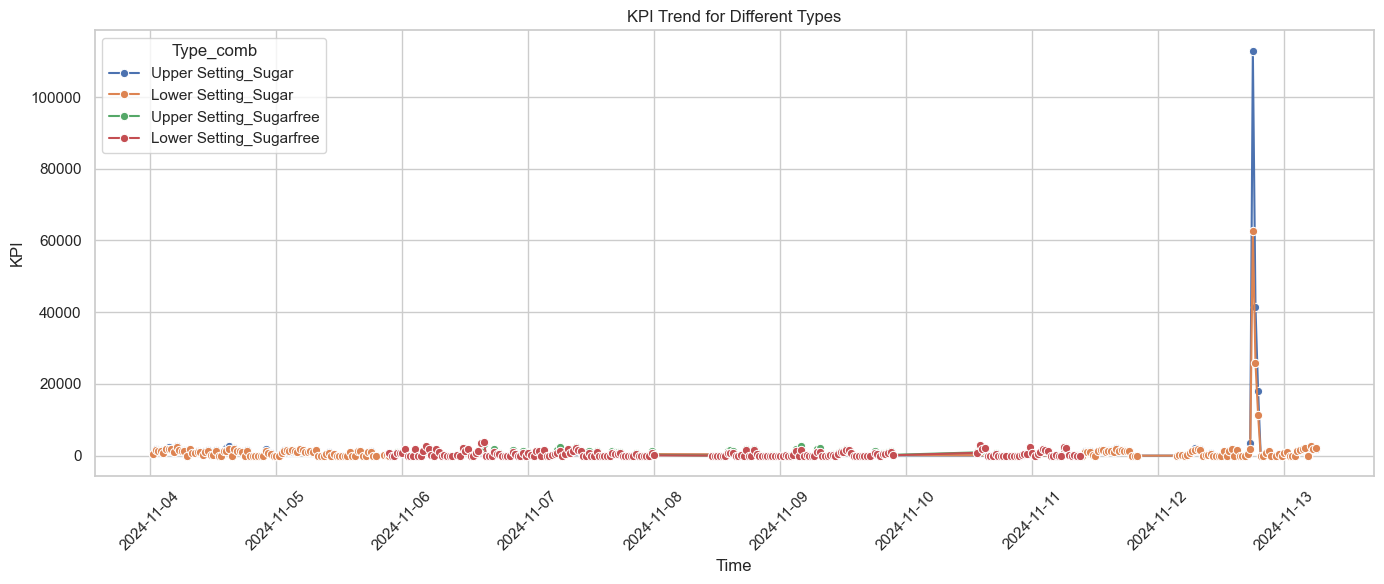

In [47]:
# 合并数据
kpi_data = pd.concat([kpi_upper_sugar, kpi_lower_sugar, kpi_upper_sugarfree, kpi_lower_sugarfree], ignore_index=True)
kpi_data['Type_comb'] = kpi_data.apply(lambda row: f"{row['Type']}_{row['Sugar']}", axis=1)
# 设置图形风格  
sns.set(style="whitegrid")  
  
# 绘制KPI趋势图  
plt.figure(figsize=(14, 6))  
sns.lineplot(data=kpi_data, x='Time', y='KPI', hue='Type_comb', marker="o", linestyle="-")  
  
# 设置图例和标题  
plt.title('KPI Trend for Different Types')  
plt.xlabel('Time')  
plt.ylabel('KPI')  
plt.legend(title='Type_comb')  
plt.xticks(rotation=45)  # 如果时间标签太长，可以旋转它们以便更好地显示  
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  
plt.show()

In [49]:
kpi_data.describe()

,Time,KPI
count,1416,750.000000
mean,2024-11-08 15:15:00,994.278154
min,2024-11-04 00:30:00,0.000000
25%,2024-11-06 19:00:00,4.539576
50%,2024-11-08 15:15:00,204.234033
75%,2024-11-10 11:30:00,1243.327946
max,2024-11-13 06:00:00,112927.388691
std,NaN,5101.703832


In [61]:
kpi_data[kpi_data['Type_comb']=='Upper Setting_Sugar'].describe()

,Time,KPI
count,444,166.000000
mean,2024-11-08 15:15:00,1839.898687
min,2024-11-04 00:30:00,0.000000
25%,2024-11-06 07:52:30,7.816562
50%,2024-11-08 15:15:00,842.674698
75%,2024-11-10 22:37:30,1447.319791
max,2024-11-13 06:00:00,112927.388691
std,NaN,9357.040157


In [62]:
kpi_data[kpi_data['Type_comb']=='Lower Setting_Sugar'].describe()

,Time,KPI
count,444,166.000000
mean,2024-11-08 15:15:00,1350.007762
min,2024-11-04 00:30:00,0.000000
25%,2024-11-06 07:52:30,7.385449
50%,2024-11-08 15:15:00,837.136648
75%,2024-11-10 22:37:30,1357.898652
max,2024-11-13 06:00:00,62560.471776
std,NaN,5275.020852


C:\Users\huiwen.li\AppData\Local\Temp\ipykernel_24972\2618730504.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Type')


<Figure size 1600x800 with 0 Axes>

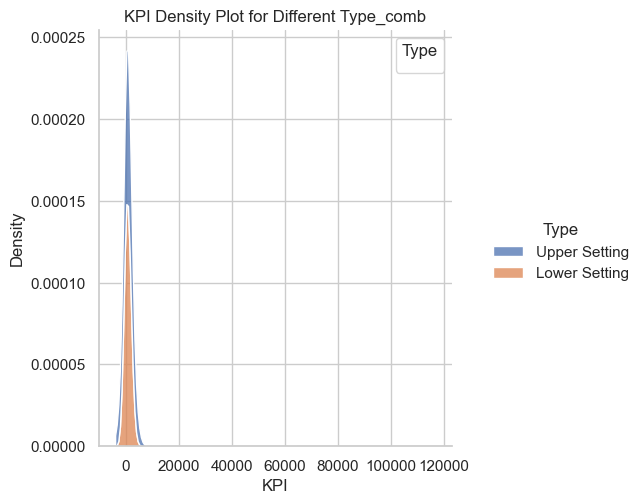

In [60]:
# 设置图形风格  
sns.set(style="whitegrid")  
  
# 绘制KPI密度图  
plt.figure(figsize=(16, 8))  
sns.displot(data=kpi_data, x='KPI', hue='Type', kind='kde', multiple='stack', fill=True)  
  
# 设置图例和标题  
plt.title('KPI Density Plot for Different Type')  
plt.xlabel('KPI')  
plt.ylabel('Density')  
plt.legend(title='Type')  
  
# 显示图形  
plt.show()

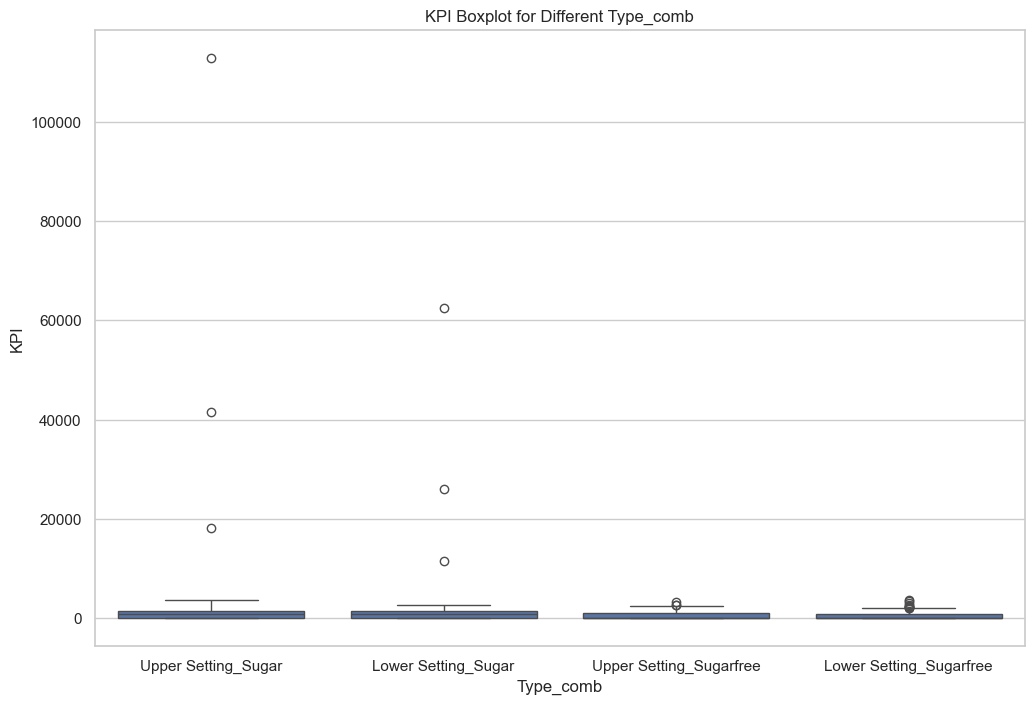

In [63]:
# 设置图形风格  
sns.set(style="whitegrid")  
  
# 绘制箱形图  
plt.figure(figsize=(12, 8))  # 设置图形的大小  
sns.boxplot(x='Type_comb', y='KPI', data=kpi_data)  
  
# 设置标题和轴标签  
plt.title('KPI Boxplot for Different Type_comb')  
plt.xlabel('Type_comb')  
plt.ylabel('KPI')  
  
# 如果需要调整箱形图的样式，可以使用以下选项（可选）  
# 例如，设置箱体的宽度、颜色等  
# sns.boxplot(x='Type_comb', y='KPI', data=kpi_data, width=0.8, palette="Set3")  
  
# 显示图形  
plt.show()

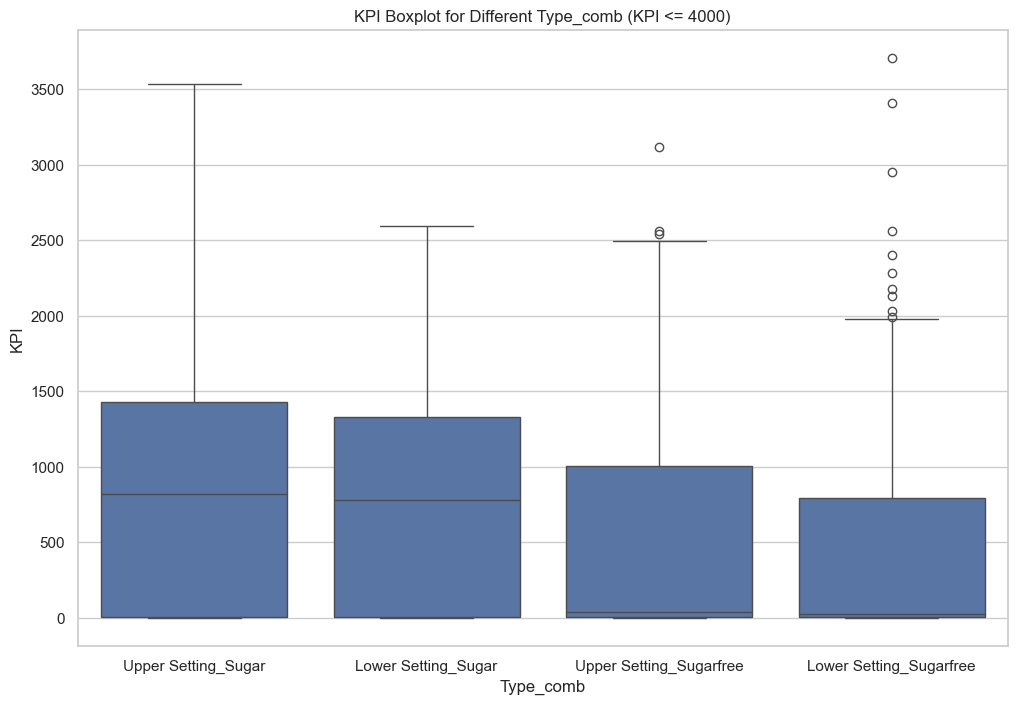

In [66]:
# 过滤掉KPI大于20000的数据点  
filtered_kpi_data = kpi_data[kpi_data['KPI'] <= 4000]  
  
# 设置图形风格  
sns.set(style="whitegrid")  
  
# 绘制箱形图  
plt.figure(figsize=(12, 8))  # 设置图形的大小  
sns.boxplot(x='Type_comb', y='KPI', data=filtered_kpi_data)  
  
# 设置标题和轴标签  
plt.title('KPI Boxplot for Different Type_comb (KPI <= 4000)')  
plt.xlabel('Type_comb')  
plt.ylabel('KPI')  
  
# 显示图形  
plt.show()

In [71]:
# 使用groupby按'Type_comb'分类，并计算每类的95%百分位数  
kpi_95_percentiles = kpi_data.groupby('Type_comb')['KPI'].quantile(0.95).reset_index()  
  
# 重命名列以更清晰地表示结果  
kpi_95_percentiles.columns = ['Type_comb', 'KPI_95th_Percentile']  
  
# 显示结果  
print(kpi_95_percentiles)

                 Type_comb  KPI_95th_Percentile
0      Lower Setting_Sugar          1985.945639
1  Lower Setting_Sugarfree          1975.982962
2      Upper Setting_Sugar          2206.861154
3  Upper Setting_Sugarfree          1972.368601


In [72]:
# 使用groupby按'Type_comb'分类，并计算每类的90%百分位数  
kpi_90_percentiles = kpi_data.groupby('Type_comb')['KPI'].quantile(0.90).reset_index()  
  
# 重命名列以更清晰地表示结果  
kpi_90_percentiles.columns = ['Type_comb', 'KPI_90th_Percentile']  
  
# 显示结果  
print(kpi_90_percentiles)

                 Type_comb  KPI_90th_Percentile
0      Lower Setting_Sugar          1792.796004
1  Lower Setting_Sugarfree          1588.787909
2      Upper Setting_Sugar          1852.080198
3  Upper Setting_Sugarfree          1684.878716
